In [1]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, hamming_loss, precision_score

In [2]:
%load_ext autoreload
%autoreload 2

from utils.DataClass import ProcessDNNTSPFile, ProcessSFCNTSPFile,ProcessGP, DataClass, ProcessTCMBNFile
from utils.Analysis import ModelComparison, Metric, ExperimentInfo
from utils.Analysis import avg_size_of_pred_set,  plot_label_distribution, kl_divergence, plot_probas_distribution, get_label_frequencies 

# DunnHumby analysis

In [3]:
dataset_name = 'DunnHumby'

In [4]:
 # кастомный класс для загрузки и предобработки в нужный формат
 # создан по правилам описаным в readme
dunnhumby_sfcntsp = ProcessSFCNTSPFile(dataset_name)
dunnhumby_sfcntsp_dataclass = DataClass(dunnhumby_sfcntsp)

In [5]:

dunnhumby_dnntsp = ProcessDNNTSPFile(dataset_name)
# передаю наследника класса processed dataset в DataClass
dunnhumby_dnntsp = DataClass(dunnhumby_dnntsp)


In [6]:
dunnhumby_gp = ProcessGP(dataset_name)
dunnhumby_gp = DataClass(dunnhumby_gp)

In [9]:
dunnhumby_tcmbn = ProcessTCMBNFile(dataset_name)
dunnhumby_tcmbn = DataClass(dunnhumby_tcmbn)

In [10]:
# В инициализатор класса ModelComparison
# передаем обьекты DataClass, от разных моделей на одном датасете, которые мы хотим сравнивать
# Во время инициализации произойдет проверка того что данные получены из одного датасета
# И соотвествующие сообщения будут распечатаны
# test_comp = ModelComparison(dunnhumby_dnntsp, dunnhumby_sfcntsp, dunnhumby_gp)
test_comp = ModelComparison(dunnhumby_sfcntsp_dataclass, dunnhumby_dnntsp, dunnhumby_tcmbn, dunnhumby_gp)

Experiments are performed on dataset with common name
ERROR: Seems that gt differs between experiments
ERROR: Max set sizes are unequal between datasets
[9, 9, 6, 9]
ERROR: Set sizes distributions in gt are not equal


ValueError: There is an error with datasets, initialization aborted

In [32]:
# Здесь нужно определить два массива с метриками которые вы хотите взять
# metric_list - Это метрики которые считаются в постановке multilabel
# metric_list_for_labels - метрики которые считаются в постановке бинарной классификации
# массив metric_list_for_labels нужен для построение метрик per label

# в эти массивы вы передаете:
# 1. обьект функции метрики
# 2. 'pred_labels' или 'probas' в зависимости от того с чем работает метрика
# дело в том, что под капотом зашита своя стратегия выбора порогов, вместо взятия 
# обычного 0.5, которое делает sklearn, если передать ему вероятности, а не сами лейблы
# - именнованным аргументом name передаете как назвать метрику(для отображения на графиках)
# если этот параметр не передать, по умолчанию будет взят
# metric_func + str(kwargs)
# - далее передаете желаемые аргументы kwargs, которые вы можете захотеть подставить в
# саму метрику. Например, передавая параметр average=<...> в инициализатор
# при вызове соотвествующей метрики, этот параметр будет подставлен

metric_list_for_set_sizes = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted', zero_division=1.0),
    Metric(hamming_loss, 'pred_labels'),
]

metric_list = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted'),
    Metric(hamming_loss, 'pred_labels'),
    Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),
    
]

    # Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),


metric_list_for_labels = [
    Metric(accuracy_score, 'pred_labels'),
    Metric(precision_score, 'pred_labels')
]

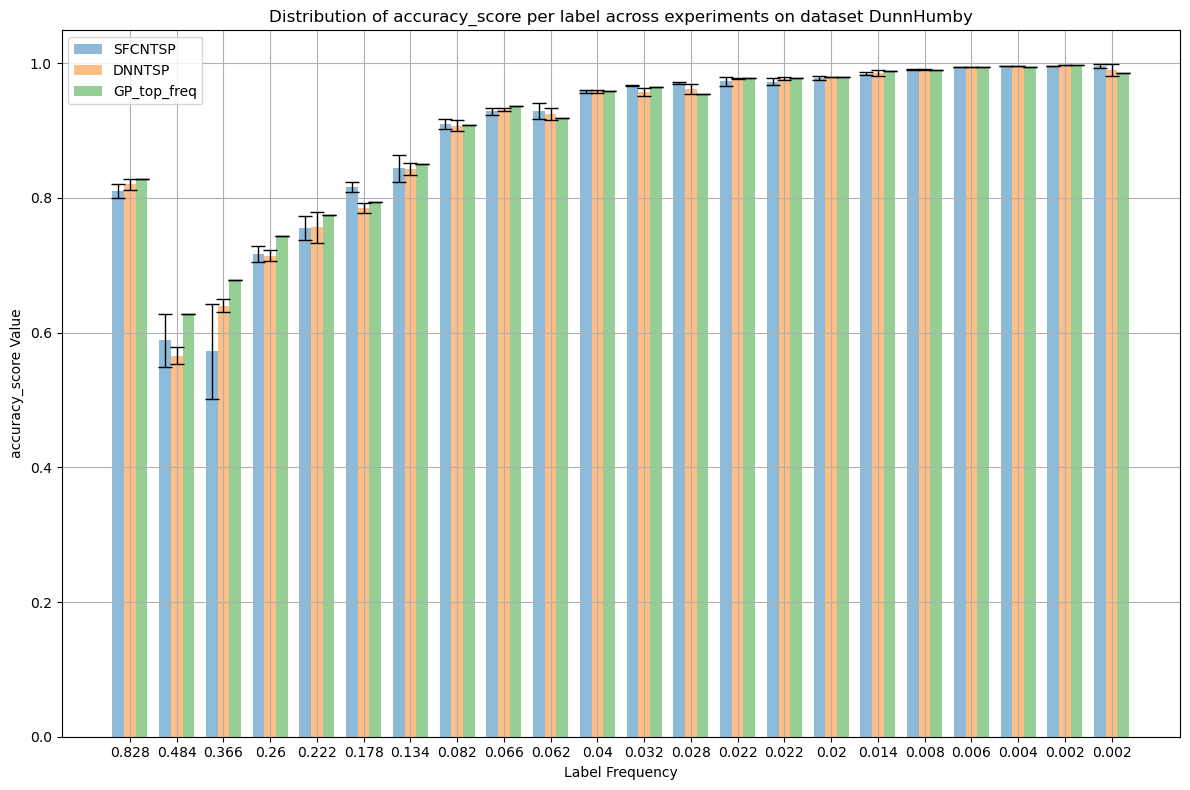

/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classifica

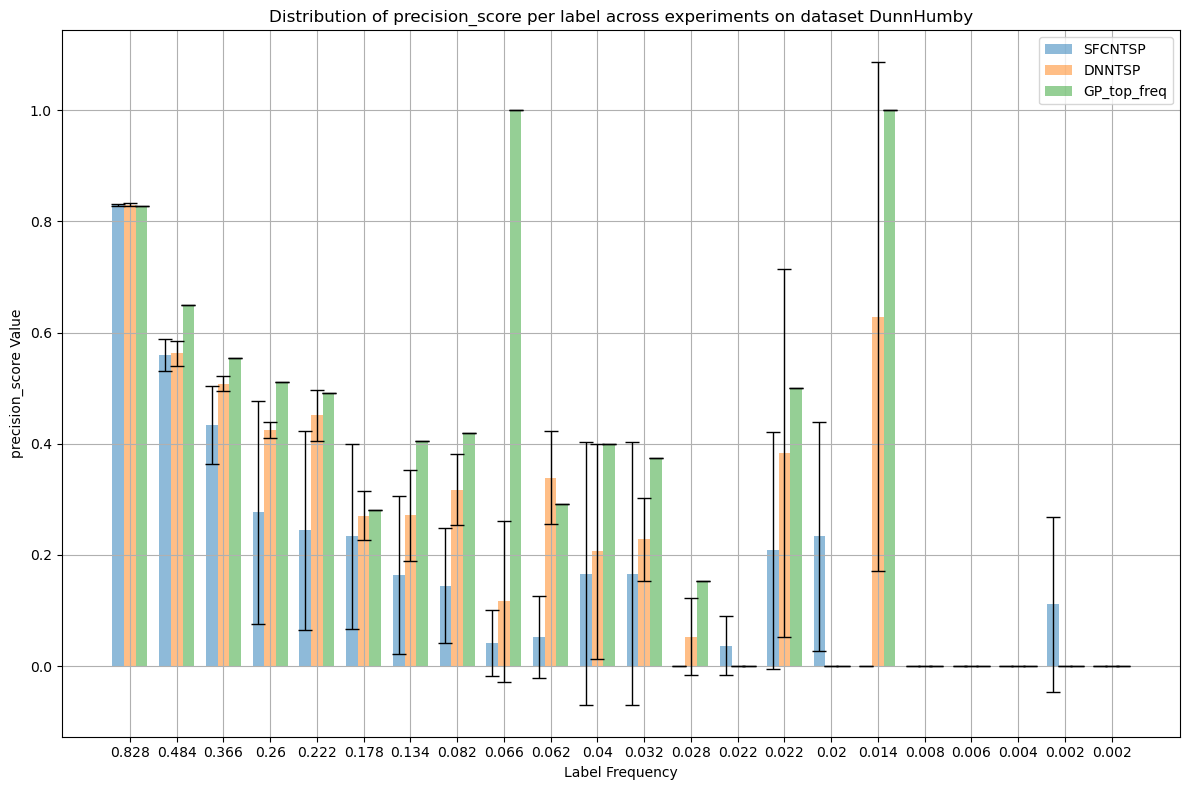

22
[0.04  0.002 0.022 0.002 0.178 0.484 0.02  0.004 0.828 0.082 0.222 0.26
 0.028 0.014 0.062 0.134 0.366 0.032 0.022 0.066 0.008 0.006]


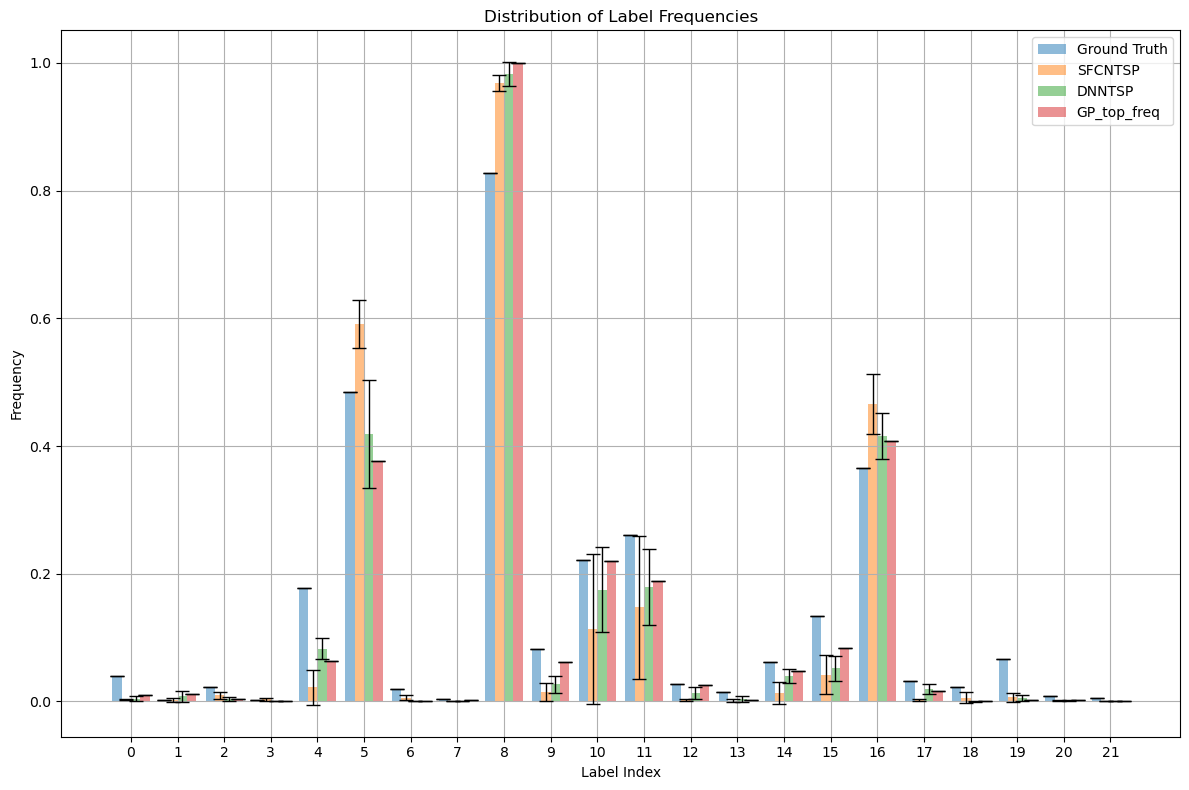

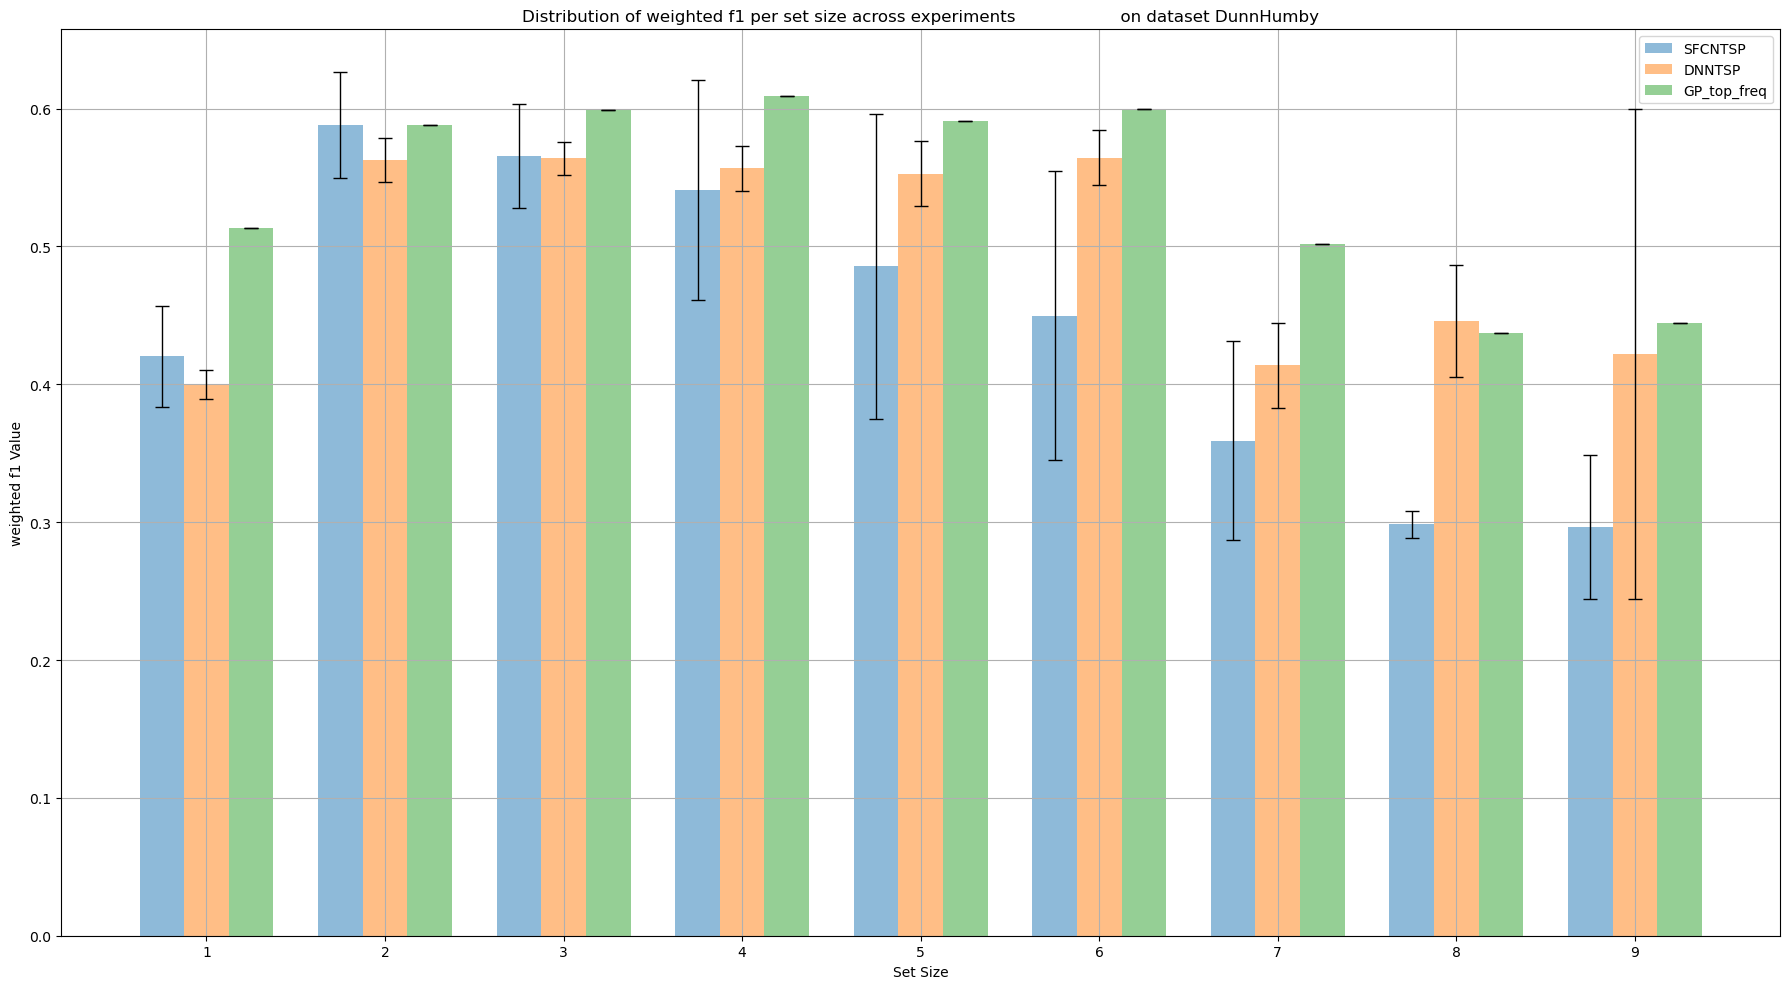

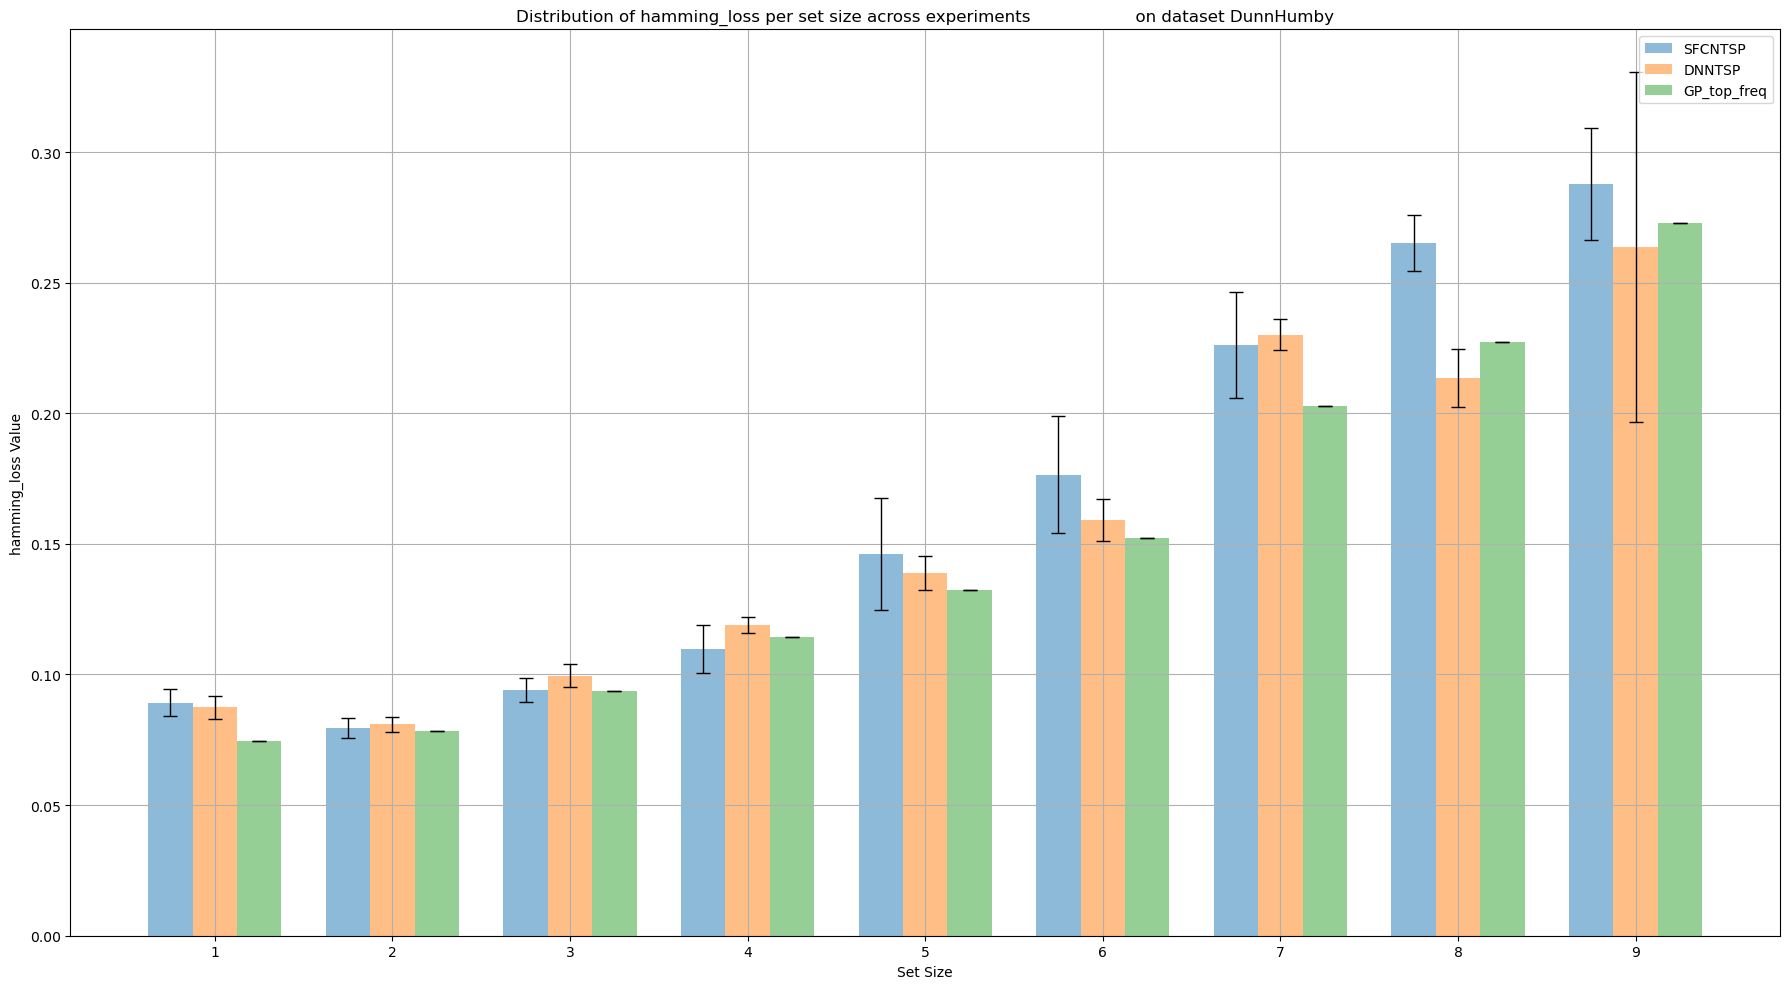

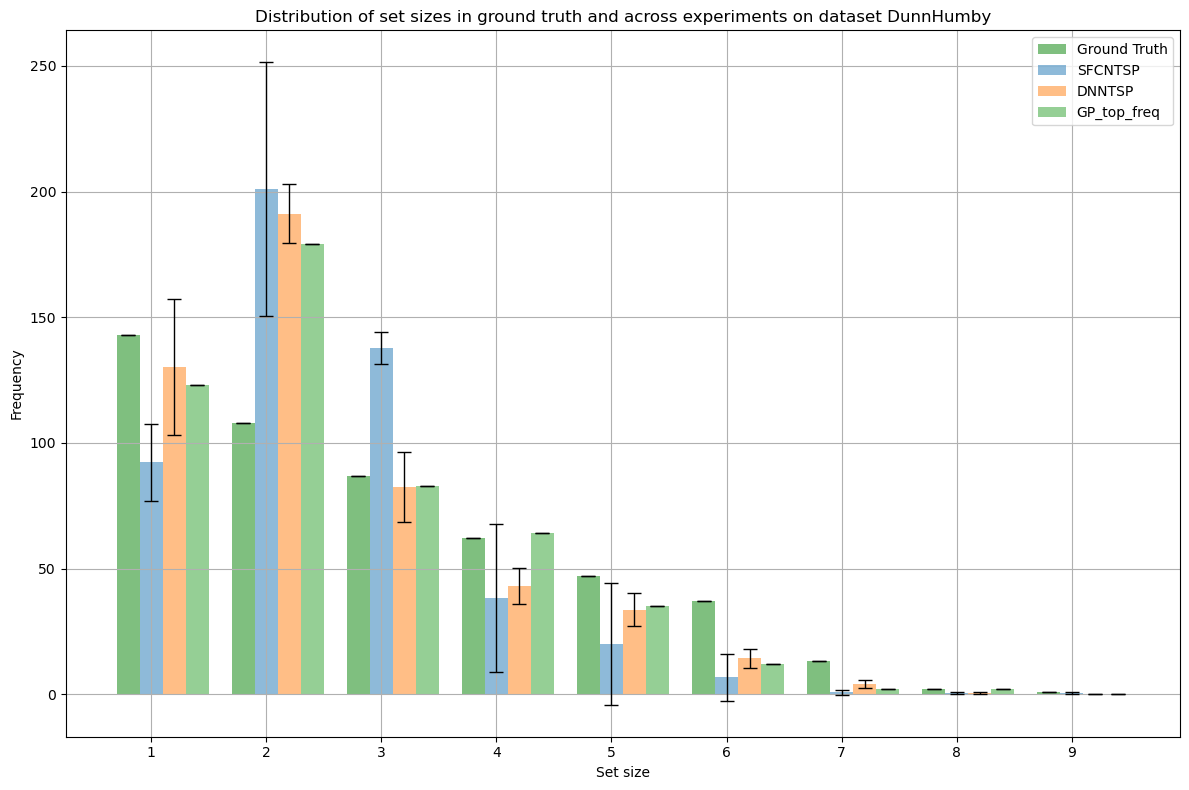

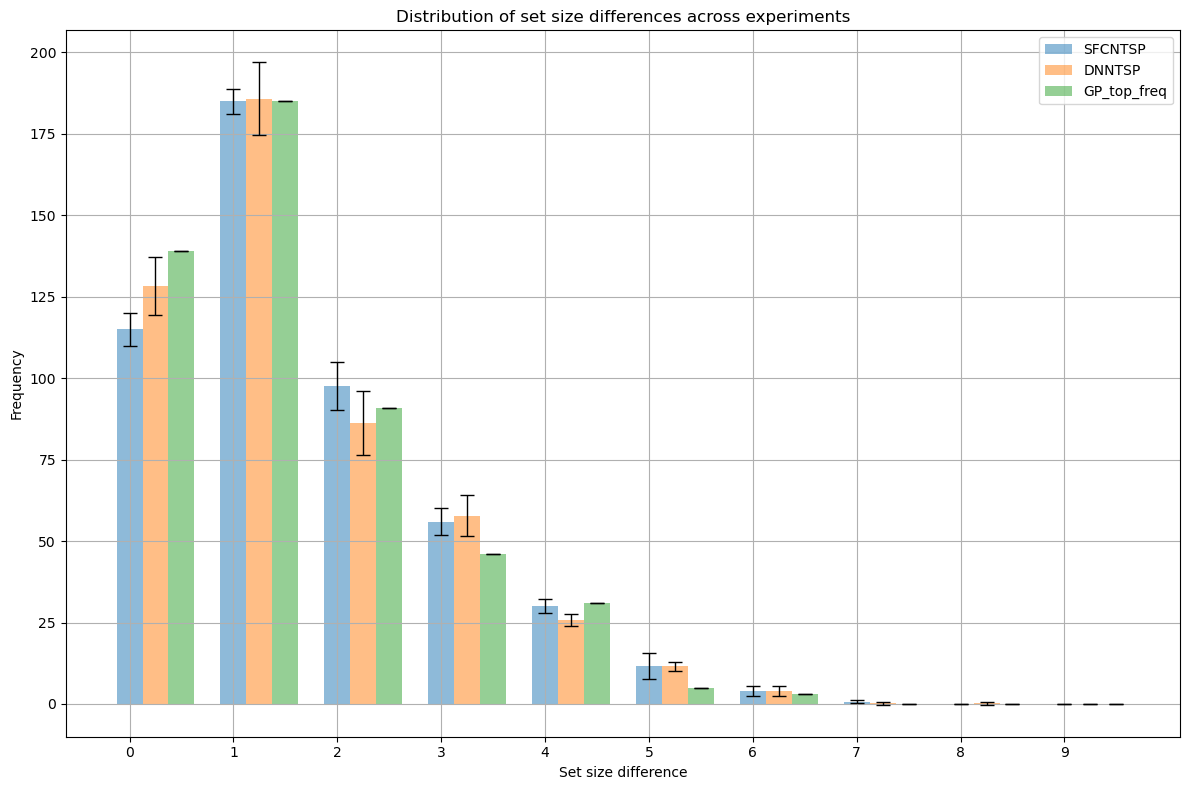

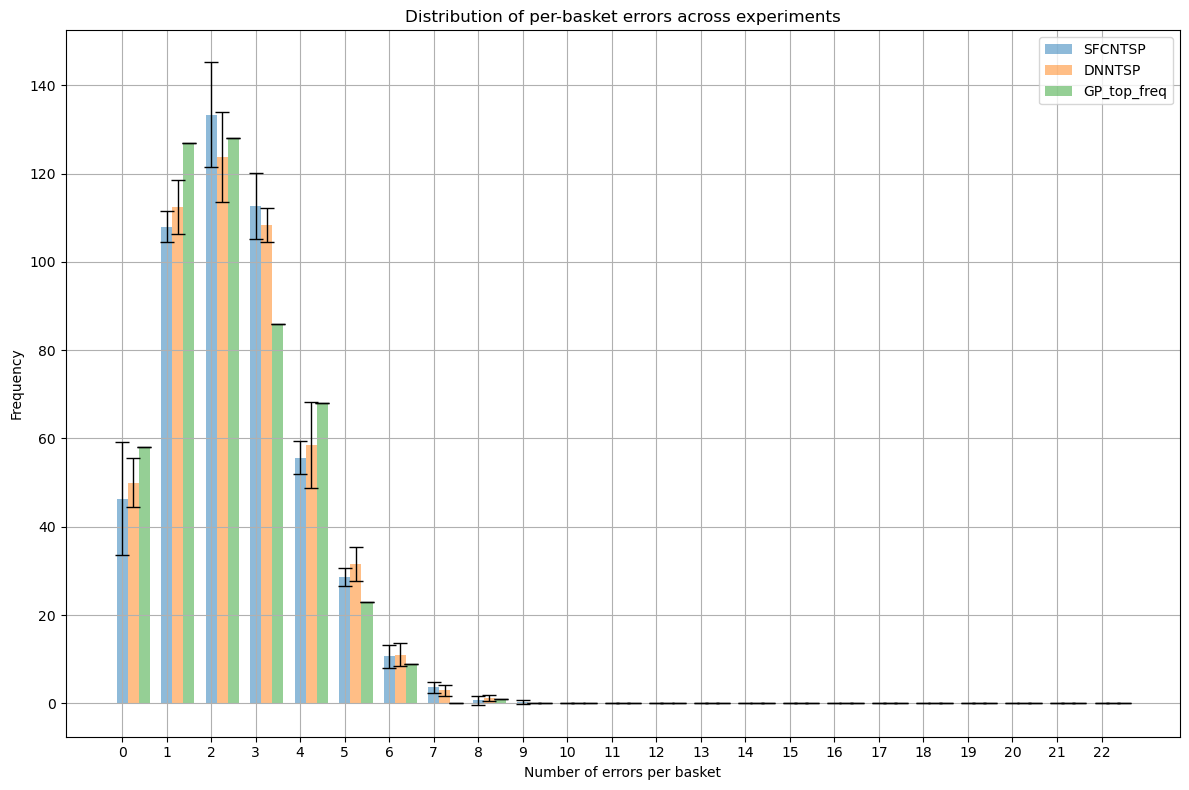

,SFCNTSP,DNNTSP,GP_top_freq
weighted f1(mean),0.475073,0.505998,0.555646
weighted f1(std),0.063456,0.008413,0.000000
hamming_loss(mean),0.106970,0.106745,0.099091
hamming_loss(std),0.003386,0.002327,0.000000
weighted ROC AUC(mean),0.608063,0.655800,0.709285
weighted ROC AUC(std),0.064014,0.008145,0.000000


In [36]:
# У обьекта класса ModelComparison вызываете метод evaluate_and_save
# он построит все графики, посчитает метрики и сохранит их
# при подсчете будут использованы метрики,  которые вы перечислили в массивах выше
# также есть именованные параметры show и save
# show отвечает за вывод графиков(при False, графики не будут выведены),
# нужен чтобы не засорять вывод если нужно
# save отвечает за сохранение


test_comp.evaluate_and_save(metric_list_for_set_sizes, metric_list_for_labels, metric_list, figsize=(12,8),show=True)